# Функции потерь

## 1) Регрессия

### 1. Mean Squared Error Loss (MSELoss)

Вычисляет средний квадрат разницы между предсказанными и истинными значениями.  

Очень чувствительна к большим ошибкам (выбросам).  

In [12]:
import torch
import torch.nn as nn

criterion = nn.MSELoss()

predictions = torch.tensor([2.5, 3.0, 1.8])
targets = torch.tensor([2.0, 3.2, 1.5])

loss = criterion(predictions, targets)
print(f"MSE Loss: {loss.item():.4f}")


MSE Loss: 0.1267


### 2. Mean Absolute Error Loss (L1Loss) 

Среднее абсолютное отклонение.  

Более робастна к выбросам, чем MSE.  

In [13]:
criterion_mae = nn.L1Loss()

predictions = torch.tensor([2.5, 3.0, 1.8])
targets = torch.tensor([2.0, 3.2, 1.5])

loss_mae = criterion_mae(predictions, targets)
print(f"MAE Loss: {loss_mae.item():.4f}")


MAE Loss: 0.3333


### 3. Huber Loss (Smooth L1 Loss) 

Комбинация MSE и MAE, помогает уменьшить влияние выбросов.

In [14]:
criterion_huber = nn.SmoothL1Loss()

predictions = torch.tensor([2.5, 3.0, 1.8])
targets = torch.tensor([2.0, 3.2, 1.5])

loss_huber = criterion_huber(predictions, targets)
print(f"Huber Loss: {loss_huber.item():.4f}")


Huber Loss: 0.0633


## 2) Классификация

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



import torch
import torch.nn as nn



In [11]:
# Шаг 1: Создание данных
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           weights=[0.5, 0.5], random_state=42)

# Шаг 2: Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Шаг 3: Обучение модели sklearn
model = LogisticRegression()
model.fit(X_train, y_train)

# Шаг 4: Получение вероятностей для класса 1
y_probs = model.predict_proba(X_test)[:, 1]  # вероятности принадлежности к классу 1

# Переводим в тензоры
y_probs_torch = torch.tensor(y_probs, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)



### Бинарная кросс-энтропия 

nn.BCELoss — для вероятностей

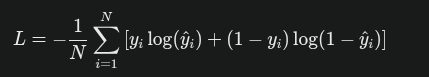

In [6]:
# Шаг 5: Создаем функцию потерь BCELoss
criterion = nn.BCELoss()

# Вычисляем loss
loss = criterion(y_probs_torch, y_test_torch)
print("Loss:", loss.item())

Loss: 0.39712637662887573


nn.BCEWithLogitsLoss — для логитов

In [10]:
criterion = nn.BCEWithLogitsLoss()

# Вычисляем loss
loss = criterion(y_probs_torch, y_test_torch)
print("Loss:", loss.item())

Loss: 0.6462437510490417


### Категориальная Кросс-энтропия 

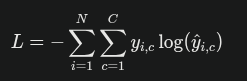  

In [ ]:
import torch
import torch.nn as nn

# Пример: 3 класса, батч из 4 объектов.
# Пусть выход модели — логиты (не softmax)
logits = torch.tensor([
    [1.2, 0.5, 2.1],   # пример 1
    [0.1, 2.0, 1.5],   # пример 2
    [1.5, 0.2, 0.3],   # пример 3
    [0.0, 1.0, 1.0]    # пример 4
], requires_grad=True)


# Правильные метки классов (индексы от 0 до 2)
targets = torch.tensor([2, 1, 0, 1])  # размер [4], каждый элемент - класс

# Создаем функцию потерь CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Считаем loss
loss = criterion(logits, targets)

print("Loss:", loss.item())


Loss: 0.8826440572738647


In [8]:
import torch

# Предсказанные вероятности после softmax (пример)
probs = torch.tensor([
    [0.3, 0.4, 0.3],
    [0.1, 0.7, 0.2],
    [0.8, 0.1, 0.1],
    [0.2, 0.5, 0.3]
])

targets = torch.tensor([2, 1, 0, 1])

# Для cross-entropy вручную нужен log вероятностей и индексы классов
log_probs = torch.log(probs)

# Выбираем логарифмы для правильных классов:
loss_per_sample = -log_probs[range(len(targets)), targets]

# Среднее значение по батчу
loss_manual = loss_per_sample.mean()

print("Manual cross-entropy loss:", loss_manual.item())


Manual cross-entropy loss: 0.6192346215248108


## 3) Компьютерное зрение